In [1]:
print(__doc__)
from collections import namedtuple
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Automatically created module for IPython interactive environment


In [2]:
dataset_read = pd.read_excel("dataset.xlsx")
dataset = dataset_read.iloc[:,0:4]
training_set = dataset.loc[dataset['Tr=traning set\nTe=test set'] == "Tr"]
test_set = dataset.loc[dataset['Tr=traning set\nTe=test set'] == "Te"]

In [3]:
fpSize=4096
xytuple = namedtuple('xytuple', ['x', 'y'])
def df_to_xy(df):
    ### return numpy of arrays
    # Make an arr of lipophillicity values
    lip_arr = df['experimental logD7.4'].values
    # Make an arr of fingerprints
    mol_series = df['SMILES structure'].apply(Chem.MolFromSmiles)
    RDK_fp_series = mol_series.apply(lambda mol: np.array(RDKFingerprint(mol, fpSize=fpSize)))
    RDK_fp_arr = np.matrix(RDK_fp_series.tolist())
    return xytuple(x=RDK_fp_arr, y=lip_arr)

In [4]:
### Prepare training set and test set to feed into ml algo
X_train, y_train = df_to_xy(training_set)
X_test, y_test = df_to_xy(test_set)

In [5]:
## Data normalization/scaling
from sklearn.preprocessing import Normalizer, MinMaxScaler

total_df = np.concatenate((X_train,X_test))
lip = np.concatenate((y_train,y_test))

std_scale = MinMaxScaler().fit(total_df)
X_train_sc = std_scale.transform(X_train)
X_test_sc  = std_scale.transform(X_test)
total_df_s = std_scale.transform(total_df)
n_scale = Normalizer().fit(total_df_s)
X_train_n = n_scale.transform(X_train_sc)
X_test_n  = n_scale.transform(X_test_sc)


enviorment_data = namedtuple('enviorment_data', ['X_train', 'y_train', 'X_test', 'y_test'])
env = enviorment_data(X_train=X_train_n, y_train=y_train, X_test=X_test_n, y_test=y_test)

/home/cfu288/anaconda3/envs/rdkit-env/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
n_components=190
X = env.X_train
pca = PCA(n_components=n_components)
X_r = pca.fit(X).transform(X)

X = env.X_test
X_r1 = pca.transform(X)

pd.DataFrame(X_r, columns=["PC{}".format(x) for x in range(1,n_components+1)]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190
0,0.028378,-0.026520,0.292802,-0.111242,-0.209545,-0.075946,-0.200334,0.112061,0.034613,0.038201,...,-0.014939,-0.002227,-0.013976,-0.001891,-0.006580,-0.012658,0.002045,-0.007185,-0.012619,0.005239
1,-0.066070,0.028518,0.191551,0.049345,-0.123992,0.103399,-0.048598,-0.021532,0.161290,0.146342,...,0.033960,-0.019196,-0.013200,-0.006938,0.012976,-0.007124,0.039064,0.052457,-0.061403,0.017585
2,0.804166,0.048277,-0.114207,-0.058066,-0.056170,0.023820,-0.025198,0.048915,0.004822,0.010301,...,-0.005575,-0.006631,-0.006372,0.008001,-0.023857,0.010782,0.003515,0.002957,0.002844,0.005846
3,-0.020718,-0.035594,0.327822,-0.140343,-0.248905,-0.088257,-0.268087,0.157591,0.041040,0.098089,...,0.002733,0.005938,-0.002216,0.001794,0.012081,0.006981,-0.001515,0.001950,0.002942,-0.009638
4,0.720153,0.042213,-0.133070,-0.095101,-0.070298,0.026620,-0.009505,0.059033,0.035170,0.032821,...,0.014457,-0.004503,-0.011762,0.012978,0.018808,-0.016939,0.006287,0.003760,-0.006475,-0.003343


In [7]:
# Percentage of variance explained for each components
print('explained variance ratio (first {} components): \n{}'.format(
    n_components,
    str(pca.explained_variance_ratio_)
    )
)

explained variance ratio (first 190 components): 
[0.05715731 0.04784566 0.03516078 0.02815847 0.02486844 0.0236141
 0.02030555 0.01967653 0.01939501 0.01753981 0.01576522 0.01455027
 0.01333859 0.01281451 0.01229297 0.01180809 0.01092908 0.0103066
 0.00975281 0.00898957 0.00889667 0.00856863 0.00811059 0.00791463
 0.0077264  0.0074961  0.00726094 0.00681713 0.00645731 0.00634959
 0.00625685 0.0059935  0.00576742 0.00567673 0.00550129 0.00547614
 0.00531106 0.0051768  0.00512524 0.00497307 0.00486694 0.0047226
 0.00462544 0.00460494 0.00444952 0.00440487 0.00431798 0.00426061
 0.00418585 0.0040312  0.00388624 0.00385804 0.00379385 0.00374971
 0.00358394 0.00349468 0.00345062 0.00341569 0.0034005  0.00334533
 0.00326468 0.00325712 0.00318683 0.00311497 0.0030979  0.00302906
 0.00302369 0.00297869 0.00293267 0.00285828 0.00284304 0.00282035
 0.00276126 0.00274663 0.00270021 0.00266624 0.00265106 0.00253929
 0.0025211  0.00248423 0.0024666  0.00243991 0.00243342 0.00239106
 0.00236575 0.0

In [8]:
tot = 0
for i, val in enumerate(pca.explained_variance_ratio_):
    if i == len(pca.explained_variance_ratio_)-1:
        print("Need More PC to reach 85%")
    elif tot >= .85:
        print("{} PC were needed to reach 85%".format(i))
        break
    else:
        tot+=val


Need More PC to reach 85%


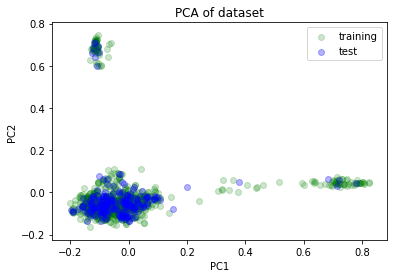

In [9]:
# Gime us an image that can help us visualize how similar each molecule is to each other, 
# as well as how similar the training set is to the test set
plt.figure()
lw = 1

plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2, lw=lw, color='green', label='training')
plt.scatter(X_r1[:, 0], X_r1[:, 1], alpha=.3, lw=lw, color='blue', label='test')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PCA of dataset')

plt.show()

In [10]:
print("In the above image we are only vizualising {:.2f}% of all of the variance.".format(sum(pca.explained_variance_ratio_[:2])*100))

In the above image we are only vizualising 10.50% of all of the variance.


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# Print formatting
class color:
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def test_model(model, name, data=env):
    print("\n{}{}{}{}\n".format(color.BOLD,color.UNDERLINE,name,color.END))
    model.fit(data.X_train, data.y_train)

    # predict on the unseen dataset
    y_pred_train = model.predict(data.X_train)
    y_pred = model.predict(data.X_test)
    mse = mean_squared_error(y_pred, data.y_test)
    mse_train = mean_squared_error(y_pred_train, data.y_train)
    rmse = np.sqrt(mse)
    r2 = model.score(data.X_test, data.y_test)

    # R-squared is a goodness-of-fit measubre for linear regression models, how much variance of the data vs our model
    # Explained variance score: 1 is perfect prediction
    print("{}r^2:{} {:.3f}".format(color.BOLD, color.END, r2))
    print('{}RMSE:{} {:.3f}'.format(color.BOLD, color.END, rmse))
    # We want a low mse
    print("{}MSE train:{} {:.3f}".format(color.BOLD, color.END, mse_train))
    print("{}MSE test:{} {:.3f}".format(color.BOLD, color.END, mse))
    
    print('So, in our model, {:.3f}% of the variability in Y can be explained using X. '.format(model.score(data.X_test, data.y_test)*100))
    print('Our model predicted most of the lipophilicity values in the test set within {:.2f} of the real value.'.format(rmse))

    ## Create a residual plot
    # Plot outputs training data
    plt.scatter(data.y_train, y_pred_train, c='b',s=40, alpha=.5)
    # Plot outputs test data
    plt.scatter(data.y_test,y_pred, c='g',s=40, alpha=.5)
    plt.xlabel("Actual lipo")
    plt.ylabel("Predicted lipo")
    plt.show()
    plt.scatter(model.predict(data.X_train), model.predict(data.X_train)-data.y_train, c='b',s=40, alpha=.5)
    plt.scatter(model.predict(data.X_test), model.predict(data.X_test)-data.y_test, c='g',s=40, alpha=.5)
    plt.title("Residual plot using training(blue) and test(green) data")
    plt.ylabel("Residuals")
    return model

In [12]:
env1 = enviorment_data(X_train=X_r, y_train=y_train, X_test=X_r1, y_test=y_test)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# Grid search
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'degree':[2,3,4], 'kernel': ['poly']},
  {'C': [1, 10, 100, 1000], 'gamma': [1 ,1e-1, 1e-2, 1e-3, 1e-4, 1e-5], 'kernel': ['rbf']},
 ]

clf = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=None, n_jobs=-1)
clf.fit(env1.X_train, env1.y_train)
print("best estimator: {}".format(clf.best_estimator_))

/home/cfu288/anaconda3/envs/rdkit-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator: SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/home/cfu288/anaconda3/envs/rdkit-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



SVM Regression

r^2: 0.790
RMSE: 0.772
MSE train: 0.173
MSE test: 0.596
So, in our model, 79.020% of the variability in Y can be explained using X. 
Our model predicted most of the lipophilicity values in the test set within 0.77 of the real value.


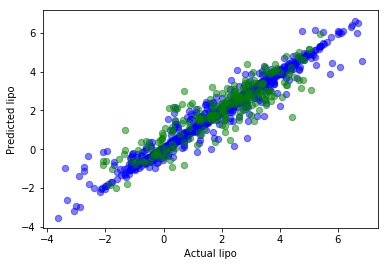

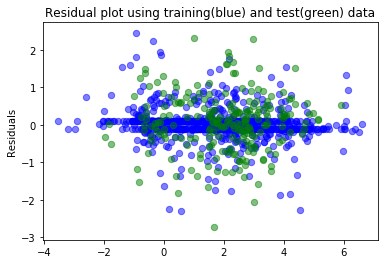

In [14]:
svm_model = clf.best_estimator_
model = test_model(svm_model, "SVM Regression", env1)